In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import seaborn as sns

In [2]:
def data_plot(xs, ys, label=''):
    plt.xlabel('x')
    plt.ylabel('y')
    plt.plot(xs, ys)
    if label: plt.legend(loc="best")


def func_plot(fn, a, b, n, label='', color='', figsize=(6, 4), subplot=None, title=''):
    if subplot is None:
        fig, ax = plt.subplots(figsize=figsize)
    else:
        ax = subplot
    xs = np.linspace(a, b, num=n)
    ys = [fn(xi) for xi in xs]
    if color:
        ax.plot(xs, ys, label=label, color=color)
    else:
        ax.plot(xs, ys, label=label)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    if label:
        ax.legend(loc="best")
    if title:
        ax.set_title(title)

In [3]:
#przedział funkcji
a = -1.7
b = 0.8
#liczba punktów na wykresach i przy obliczaniu błędów
points = 1000

In [4]:
f = lambda x, m=35, n=11: x**2 - m*(math.sin(x))**n

In [5]:
derivation_f = lambda x, m=35, n=11: 2*x - m*n*(math.sin(x))**(n-1)*math.cos(x)

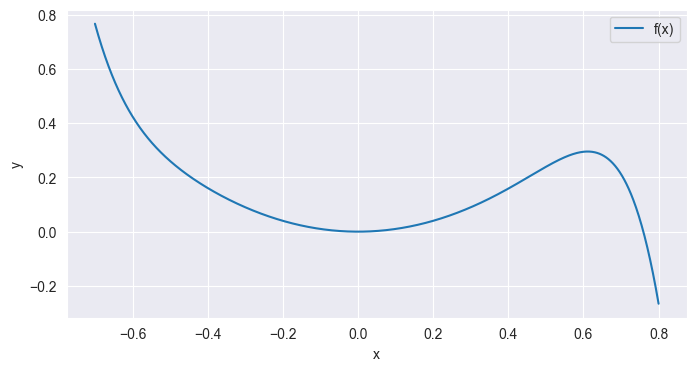

In [6]:
func_plot(f, -0.7, b, points, label="f(x)", figsize=(8,4))

In [7]:
def newton_raphson(f, df, x_0, epsilon, stop_criterion, max_iter=100):
    x_current = x_0
    iterations = 0
    while True:
        x_previous = x_current
        if df(x_previous) == 0:
            print('Division by zero')
            return None, None
        x_current = x_previous - f(x_previous)/df(x_previous)
        iterations += 1
        if stop_criterion == 'x' and abs(x_current-x_previous) < epsilon:
            break
        elif stop_criterion == 'f' and abs(f(x_current)) < epsilon:
            break
        if iterations > max_iter:
            return None, None
    return x_current, iterations

In [47]:
def secant_method(f, x_1, x_2, epsilon, stop_criterion, max_iter=100):
    iterations = 0
    while True:
        x_0 = x_1
        x_1 = x_2
        if f(x_1) - f(x_0) == 0:
            print('Division by zero')
            return None, None
        x_2 = x_1 - (x_1 - x_0)/(f(x_1)- f(x_0)) * f(x_1)
        iterations += 1
        # if x_2 < a or x_2 > b:
        #     print('Out of interval [a, b]')
        #     return None, None
        if stop_criterion == 'x' and abs(x_2 - x_1) < epsilon:
            break
        elif stop_criterion == 'f' and abs(f(x_2)) < epsilon:
            break
        if iterations > max_iter:
            print('Max iterations reached')
            return None, None
    return x_2, iterations

In [9]:
newton_raphson(f, derivation_f, 0.8, 1e-10, 'x')

(0.7594061672374626, 5)

In [10]:
secant_method(f, -1.5, 0.8, 1e-10, 'x')

(0.7594061672374626, 7)

In [11]:
def find_roots(f, df, a, b, epsilon, stop_criterion, method):
    roots = []
    iterations = []
    start_points = np.arange(a, b+0.1, 0.1)
    for x_0 in start_points:
        if method == 'newton':
            root, it = newton_raphson(f, df, x_0, epsilon, stop_criterion)
        elif method == 'secant':
            root, it = secant_method(f, x_0, x_0+0.1, epsilon, stop_criterion)
        if root not in roots:
            roots.append(root)
            iterations.append(it)
    return roots, iterations



In [57]:
pd.set_option('display.float_format', '{:.5g}'.format)
def create_table(f, df, a, b, epsilons, stop_criterion, method, max_iter=100, secant_a=True):
    start_points = np.arange(a, b+0.1, 0.1)
    start_points = np.round(start_points, 2)
    # zero_points = []
    # for x_0 in start_points:
    #     if not x_0 in [-1.6, 0.7, 0.8]:
    #         zero_points.append(x_0)
    # start_points=zero_points
    data = {}
    for epsilon in epsilons:
        data_row = []
        for x_0 in start_points:
            if method == 'newton':
                root, it = newton_raphson(f, df, x_0, epsilon, stop_criterion, max_iter)
            elif method == 'secant':
                if secant_a:
                    root, it = secant_method(f, a, x_0, epsilon, stop_criterion, max_iter)
                else:
                    root, it = secant_method(f, x_0, b, epsilon, stop_criterion, max_iter)
            # if root is not None:
            # #     root = round(root, 6)
            #     root = float(f"{root:.2g}")
            data_row.append((root, it))
        data[epsilon] = data_row
    if method == 'secant':
        if secant_a:
            intervals = [(a,x) for x in start_points]
            df = pd.DataFrame(data, index=intervals)
        else:
            intervals = [(x,b) for x in start_points]
            df = pd.DataFrame(data, index=intervals)

    else:
        df = pd.DataFrame(data, index=start_points)
    return df

In [13]:
epsilons = [1e-2, 1e-3,1e-5, 1e-8, 1e-10,1e-12, 1e-15]

In [14]:
df = create_table(f, derivation_f, a, b, epsilons, 'x', 'newton')
df = df.map(lambda cell: cell[0])
df

Division by zero
Division by zero
Division by zero
Division by zero
Division by zero
Division by zero
Division by zero


,0.01,0.001,1e-05,1e-08,1e-10,1e-12,1e-15
-1.7,-0.0085077,-0.00053173,-8.3083e-06,-8.1136e-09,-6.3387e-11,-9.9043e-13,-9.6721e-16
-1.6,0.76002,0.75941,0.75941,0.75941,0.75941,0.75941,0.75941
-1.5,-0.0085105,-0.00053191,-8.3111e-06,-8.1163e-09,-6.3408e-11,-9.9076e-13,-9.6753e-16
-1.4,-0.0061194,-0.00076493,-5.976e-06,-5.8359e-09,-9.1186e-11,-7.1239e-13,-6.957e-16
-1.3,-0.0093622,-0.00058514,-9.1428e-06,-8.9285e-09,-6.9754e-11,-5.4495e-13,-5.3218e-16
-1.2,-0.0090845,-0.00056778,-8.8716e-06,-8.6637e-09,-6.7685e-11,-5.2879e-13,-5.164e-16
-1.1,-0.0074186,-0.00092732,-7.2447e-06,-7.0749e-09,-5.5273e-11,-8.6363e-13,-8.4339e-16
-1,-0.0054407,-0.00068009,-5.3132e-06,-5.1887e-09,-8.1073e-11,-6.3338e-13,-6.1854e-16
-0.9,-0.0071853,-0.00089816,-7.0168e-06,-6.8524e-09,-5.3534e-11,-8.3647e-13,-8.1687e-16
-0.8,-0.00889,-0.00055563,-8.6817e-06,-8.4782e-09,-6.6236e-11,-5.1747e-13,-5.0534e-16


In [15]:
df = create_table(f, derivation_f, a, b, epsilons, 'x', 'newton')
df = df.map(lambda cell: cell[1])
df

Division by zero
Division by zero
Division by zero
Division by zero
Division by zero
Division by zero
Division by zero


,0.01,0.001,1e-05,1e-08,1e-10,1e-12,1e-15
-1.7,10,14,20,30,37,43,53
-1.6,12,13,14,15,15,16,16
-1.5,6,10,16,26,33,39,49
-1.4,10,13,20,30,36,43,53
-1.3,10,14,20,30,37,44,54
-1.2,10,14,20,30,37,44,54
-1.1,10,13,20,30,37,43,53
-1,10,13,20,30,36,43,53
-0.9,9,12,19,29,36,42,52
-0.8,8,12,18,28,35,42,52


In [28]:
def create_heatmap(df, xlabel, ylabel, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(df, annot=True, cmap='viridis', fmt=".5g")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

Division by zero
Division by zero
Division by zero
Division by zero
Division by zero
Division by zero
Division by zero


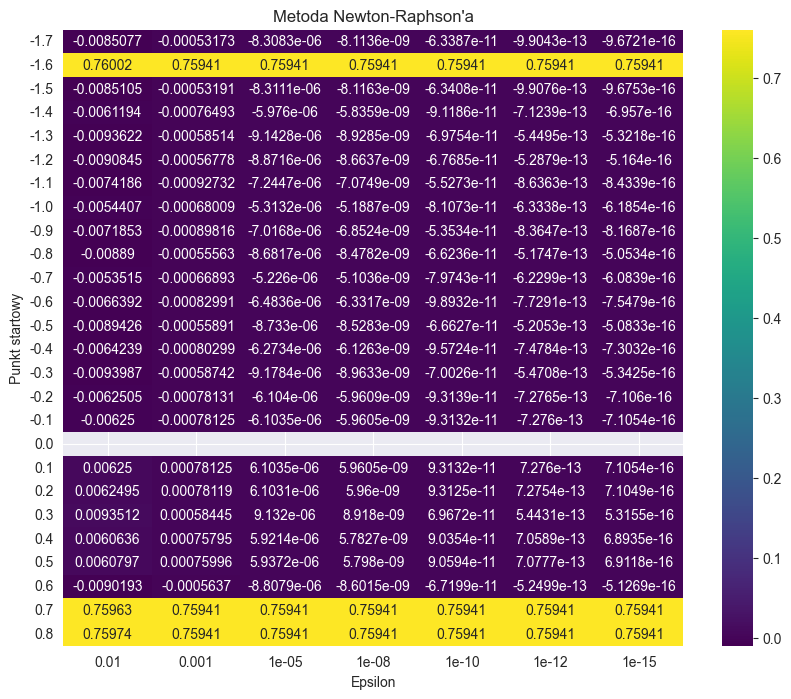

Division by zero
Division by zero
Division by zero
Division by zero
Division by zero
Division by zero
Division by zero


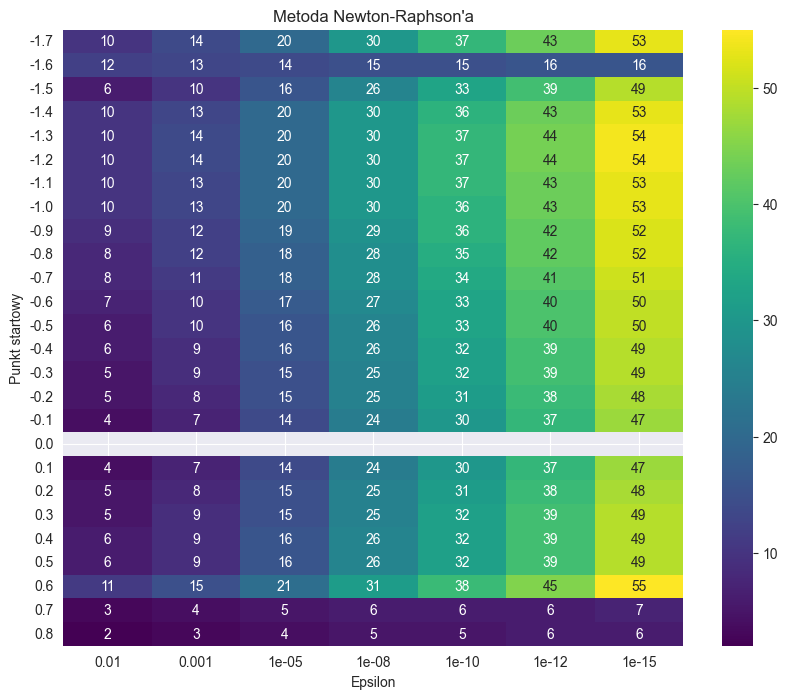

In [35]:
df = create_table(f, derivation_f, a, b, epsilons, 'x', 'newton')
create_heatmap(df.map(lambda cell: cell[0]), 'Epsilon', 'Punkt startowy', "Metoda Newton-Raphson'a")
df = create_table(f, derivation_f, a, b, epsilons, 'x', 'newton')
create_heatmap(df.map(lambda cell: cell[1]), 'Epsilon', 'Punkt startowy', "Metoda Newton-Raphson'a")
# df2 = create_table(f, derivation_f, a, b, epsilons, 'f', 'newton')
# create_heatmap(df2.map(lambda cell: cell[0]), 'Epsilon', 'Start point', 'Newton-Raphson method')
# df3 = create_table(f, derivation_f, a, b, epsilons, 'f', 'secant', max_iter=1000)
# create_heatmap(df3.map(lambda cell: cell[1]), 'Epsilon', 'Start point', 'Newton-Raphson method')
# df4 = create_table(f, derivation_f, a, b, epsilons, 'x', 'secant')
# create_heatmap(df4.map(lambda cell: cell[1]), 'Epsilon', 'Start point', 'Newton-Raphson method')

Division by zero
Division by zero
Division by zero
Division by zero
Division by zero
Division by zero
Division by zero


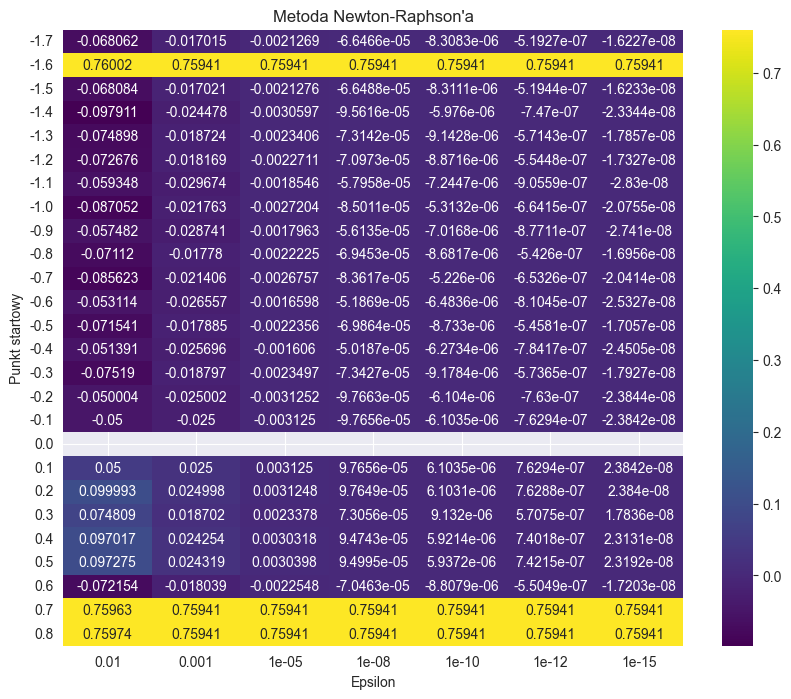

Division by zero
Division by zero
Division by zero
Division by zero
Division by zero
Division by zero
Division by zero


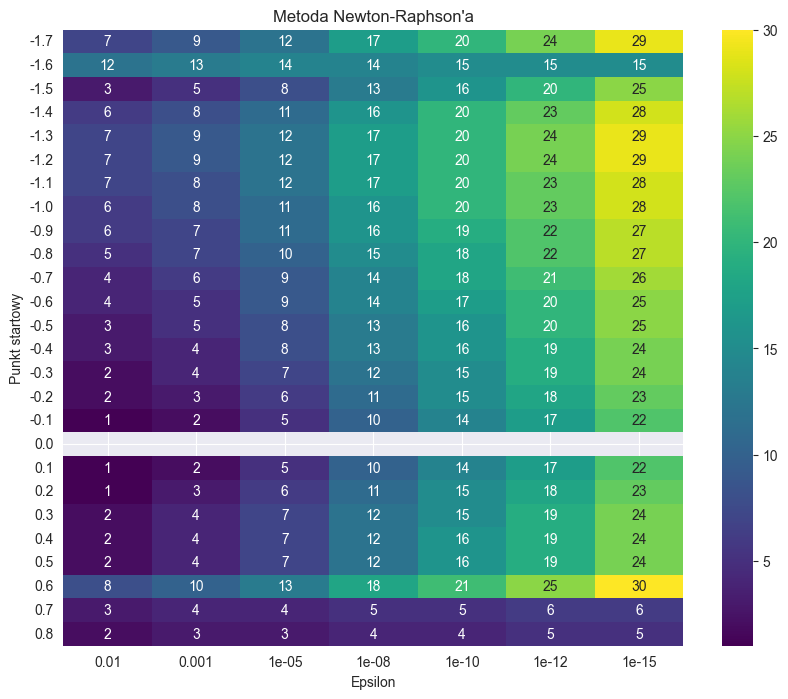

In [36]:
df = create_table(f, derivation_f, a, b, epsilons, 'f', 'newton')
create_heatmap(df.map(lambda cell: cell[0]), 'Epsilon', 'Punkt startowy', "Metoda Newton-Raphson'a")
df = create_table(f, derivation_f, a, b, epsilons, 'f', 'newton')
# create_heatmap(df.map(lambda cell: cell[1]), 'Epsilon', 'Punkt startowy', "Metoda Newton-Raphson'a")

Division by zero
Division by zero
Division by zero
Division by zero
Division by zero
Division by zero
Division by zero


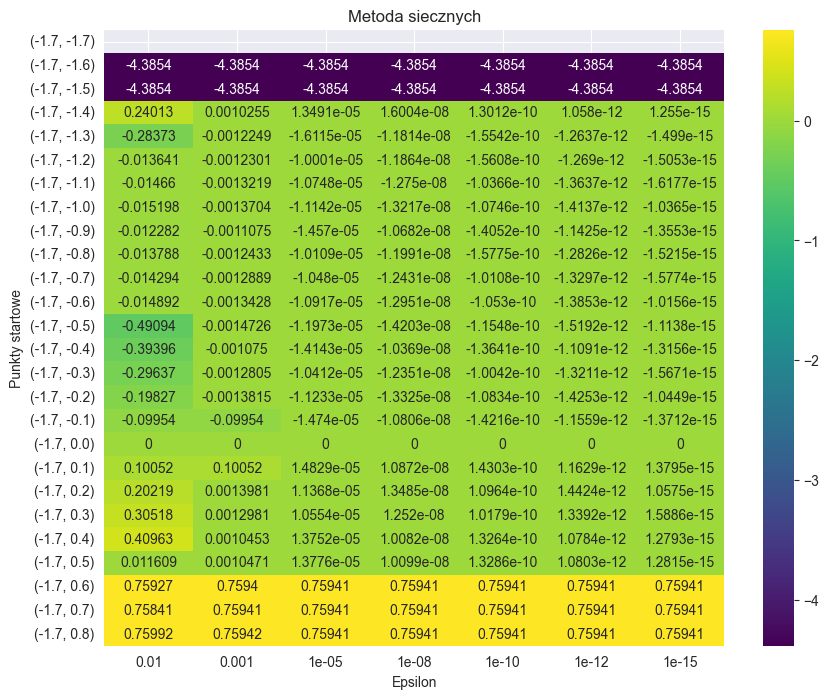

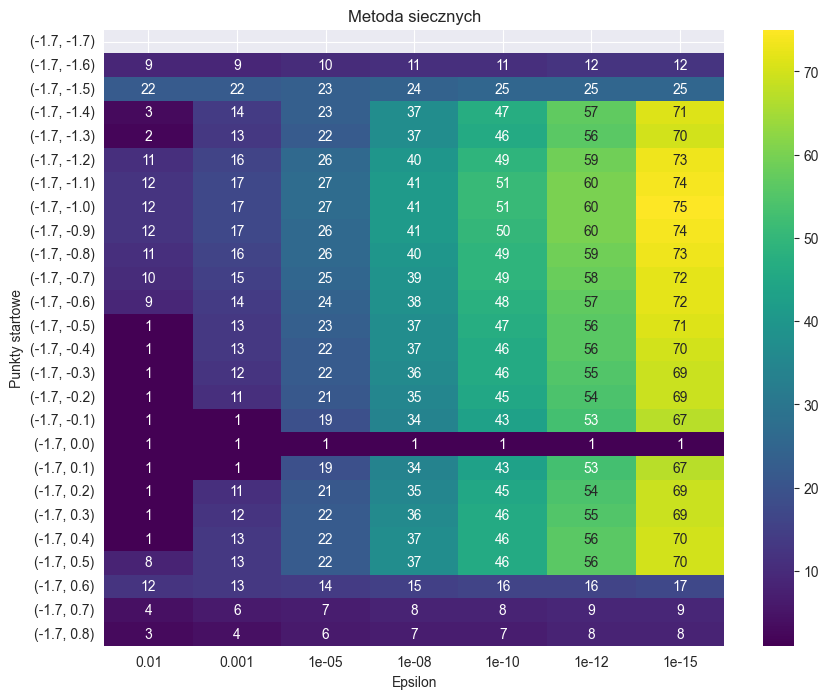

In [58]:
df4 = create_table(f, derivation_f, a, b, epsilons, 'x', 'secant', secant_a=True)
create_heatmap(df4.map(lambda cell: cell[0]), 'Epsilon', 'Punkty startowe', 'Metoda siecznych')
create_heatmap(df4.map(lambda cell: cell[1]), 'Epsilon', 'Punkty startowe', 'Metoda siecznych')

Division by zero
Division by zero
Division by zero
Division by zero
Division by zero
Division by zero
Division by zero


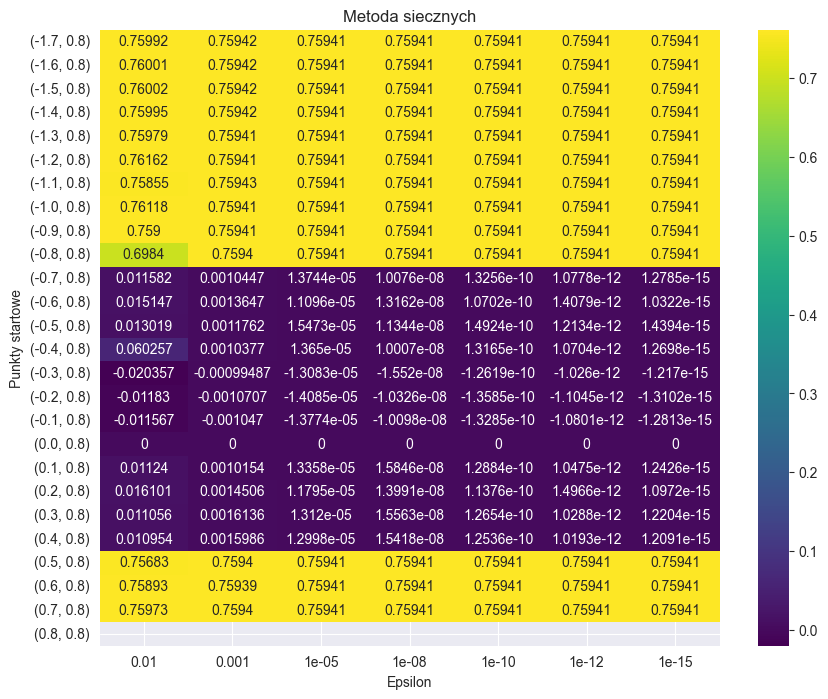

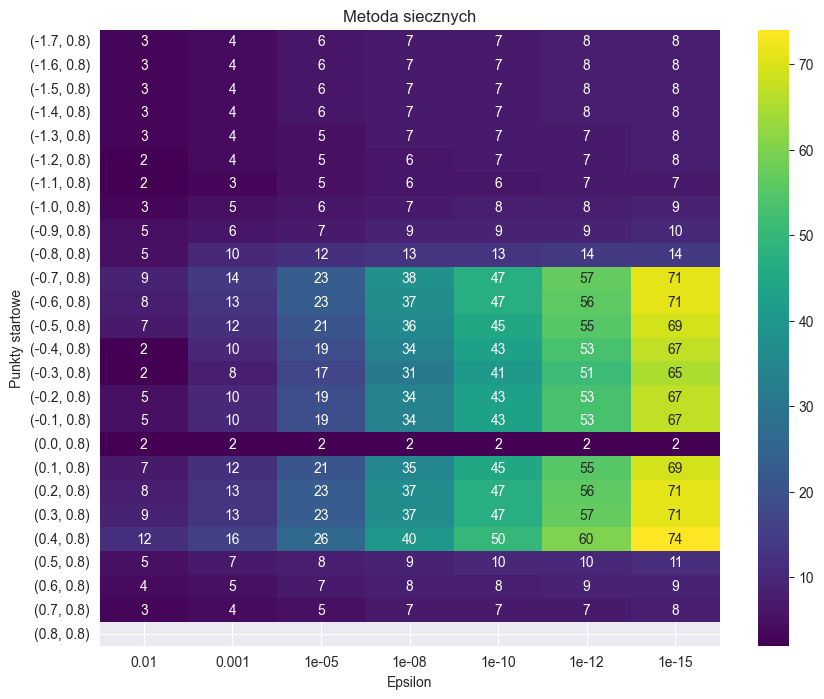

In [60]:
df4 = create_table(f, derivation_f, a, b, epsilons, 'x', 'secant', secant_a=False)
create_heatmap(df4.map(lambda cell: cell[0]), 'Epsilon', 'Punkty startowe', 'Metoda siecznych')
create_heatmap(df4.map(lambda cell: cell[1]), 'Epsilon', 'Punkty startowe', 'Metoda siecznych')

Division by zero
Division by zero
Division by zero
Division by zero
Division by zero
Division by zero
Division by zero
Division by zero
Division by zero


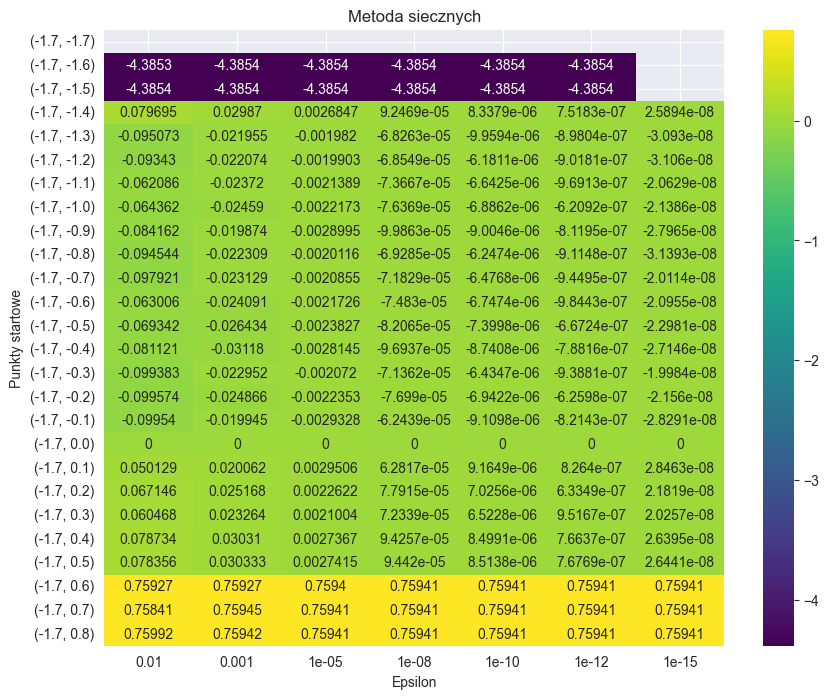

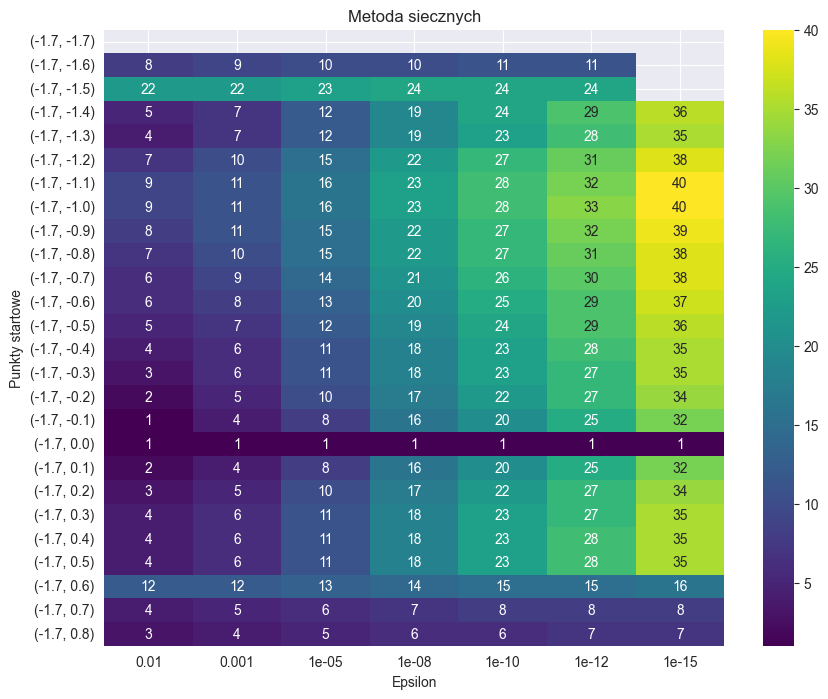

In [61]:
df4 = create_table(f, derivation_f, a, b, epsilons, 'f', 'secant', secant_a=True)
create_heatmap(df4.map(lambda cell: cell[0]), 'Epsilon', 'Punkty startowe', 'Metoda siecznych')
create_heatmap(df4.map(lambda cell: cell[1]), 'Epsilon', 'Punkty startowe', 'Metoda siecznych')

Division by zero
Division by zero
Division by zero
Division by zero
Division by zero
Division by zero
Division by zero


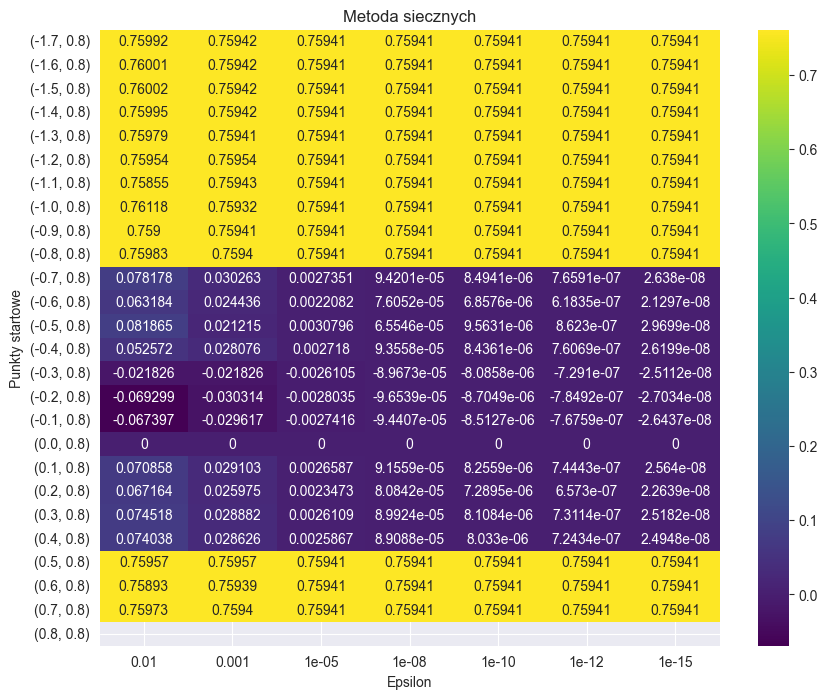

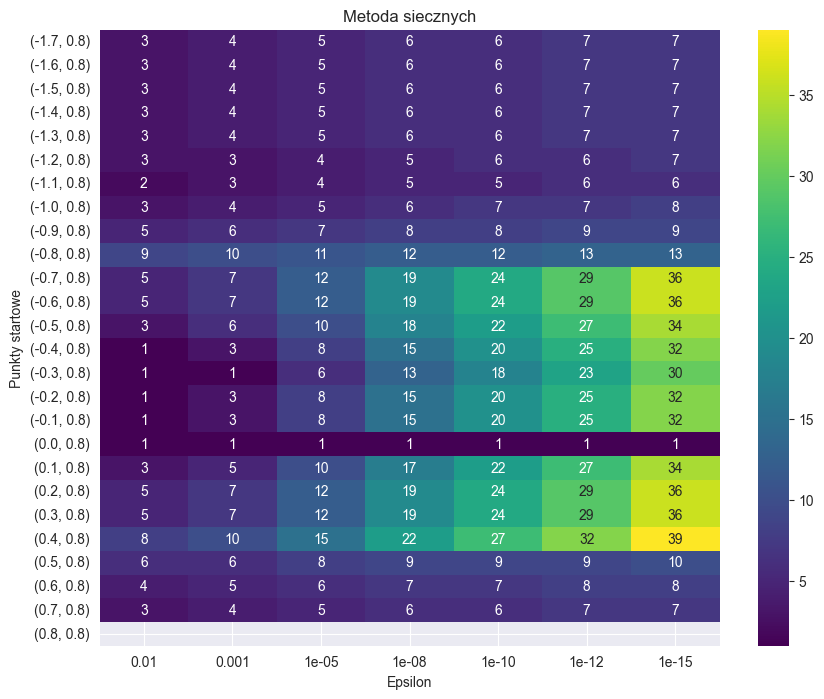

In [62]:
df4 = create_table(f, derivation_f, a, b, epsilons, 'f', 'secant', secant_a=False)
create_heatmap(df4.map(lambda cell: cell[0]), 'Epsilon', 'Punkty startowe', 'Metoda siecznych')
create_heatmap(df4.map(lambda cell: cell[1]), 'Epsilon', 'Punkty startowe', 'Metoda siecznych')